# price analysis by neighborhood

In [206]:
import pandas as pd
import glob

search_string = 'data/apts_all_?bedrooms.pkl'

data = pd.concat([
    pd.concat([d.reset_index(drop=True), pd.Series([bdr,]*len(d), name='bedrooms')], axis=1) for d,bdr in [
        (pd.read_pickle(p),int(p.split('apts_all_')[1][0])) for p in glob.glob(search_string)
    ]
]).set_index('code')
data['date'] = pd.DatetimeIndex(data.date)
data['day'] = data.date.apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))

In [157]:
axs[i].get_xticks()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Index(['inner richmond', 'laurel hts / presidio', 'lower haight',
       'alamo square / nopa', 'inner sunset / UCSF', 'richmond / seacliff',
       'haight ashbury', 'cole valley / ashbury hts', 'castro / upper market',
       'lower pac hts'],
      dtype='object', name='location')

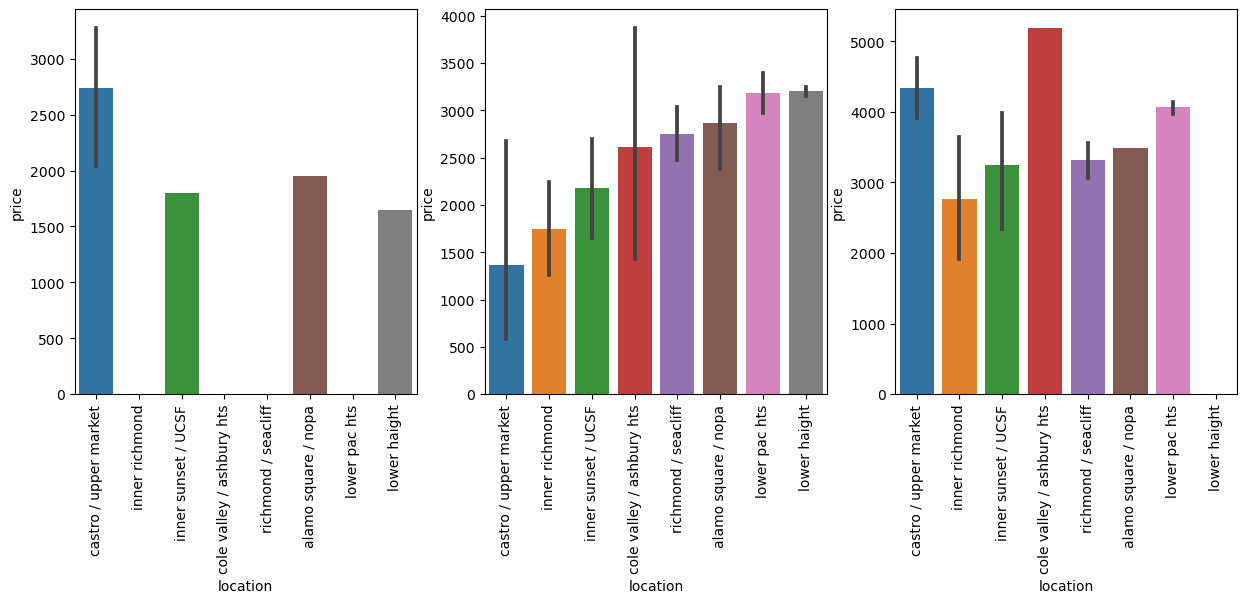

In [165]:
import seaborn as sns

ordering = list(data[data.bedrooms ==1].groupby('location').price.mean().sort_values().index)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i,n in enumerate(data.bedrooms.unique()):
    sns.barplot(data=data[data.bedrooms == n], y='price', x='location', ax=axs[i], order=ordering)
    axs[i].set_xticks(axs[i].get_xticks(), axs[i].get_xticklabels(), rotation=90)

In [136]:
data.groupby(['location', 'bedrooms', pd.Grouper(freq='D', key='date', label='left')]).price.mean()

location                   bedrooms  date      
alamo square / nopa        0         2023-05-26         1950.0
                           1         2023-05-24         1550.0
                                     2023-05-25         3265.0
                                     2023-05-26    2913.333333
                           2         2023-05-25         3495.0
castro / upper market      0         2023-05-24         2312.0
                                     2023-05-25         2889.5
                                     2023-05-26         3279.0
                           1         2023-05-24         3300.0
                                     2023-05-25     716.666667
                           2         2023-05-24         4000.0
                                     2023-05-25        4336.75
                                     2023-05-26         4442.0
cole valley / ashbury hts  1         2023-05-25         2617.0
                           2         2023-05-25         5195.0
haight 

In [171]:
weekly = data.groupby(['bedrooms', 'location', pd.Grouper(key='date', freq='D', label='left')])
mu, sigma = weekly.price.mean(), weekly.price.std()

In [177]:
mu.index.get_level_values('bedrooms').unique()

Index([0, 1, 2], dtype='int64', name='bedrooms')

In [180]:
mu[1,'alamo square / nopa']

date
2023-05-24         1550.0
2023-05-25         3265.0
2023-05-26    2913.333333
Freq: D, Name: price, dtype: object

In [ ]:
mu[0, ]

In [189]:
mu

date                               2023-05-24   2023-05-25   2023-05-26
bedrooms location                                                      
0        alamo square / nopa              NaN          NaN       1950.0
         castro / upper market         2312.0       2889.5       3279.0
         haight ashbury                   NaN          NaN       1750.0
         inner sunset / UCSF              NaN       1800.0          NaN
         lower haight                     NaN       1650.0          NaN
1        alamo square / nopa           1550.0       3265.0  2913.333333
         castro / upper market         3300.0   716.666667          NaN
         cole valley / ashbury hts        NaN       2617.0          NaN
         inner richmond                2895.0       1438.0       2100.0
         inner sunset / UCSF              NaN       2175.0          NaN
         lower haight                     NaN       3250.0       3150.0
         lower pac hts                 3162.5       3162.5       3250.0
         richmond / seacliff           3295.0          NaN      2611.25
2        alamo square / nopa              NaN       3495.0          NaN
         castro / upper market         4000.0      4336.75       4442.0
         cole valley / ashbury hts        NaN       5195.0          NaN
         haight ashbury                   NaN          NaN       4500.0
         inner richmond                   NaN       3017.0       1500.0
         inner sunset / UCSF           3835.0       3490.0       2765.0
         laurel hts / presidio            NaN          NaN       2500.0
         lower pac hts                    NaN  4058.333333       4125.0
         richmond / seacliff           3430.0       3330.0       2995.0

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


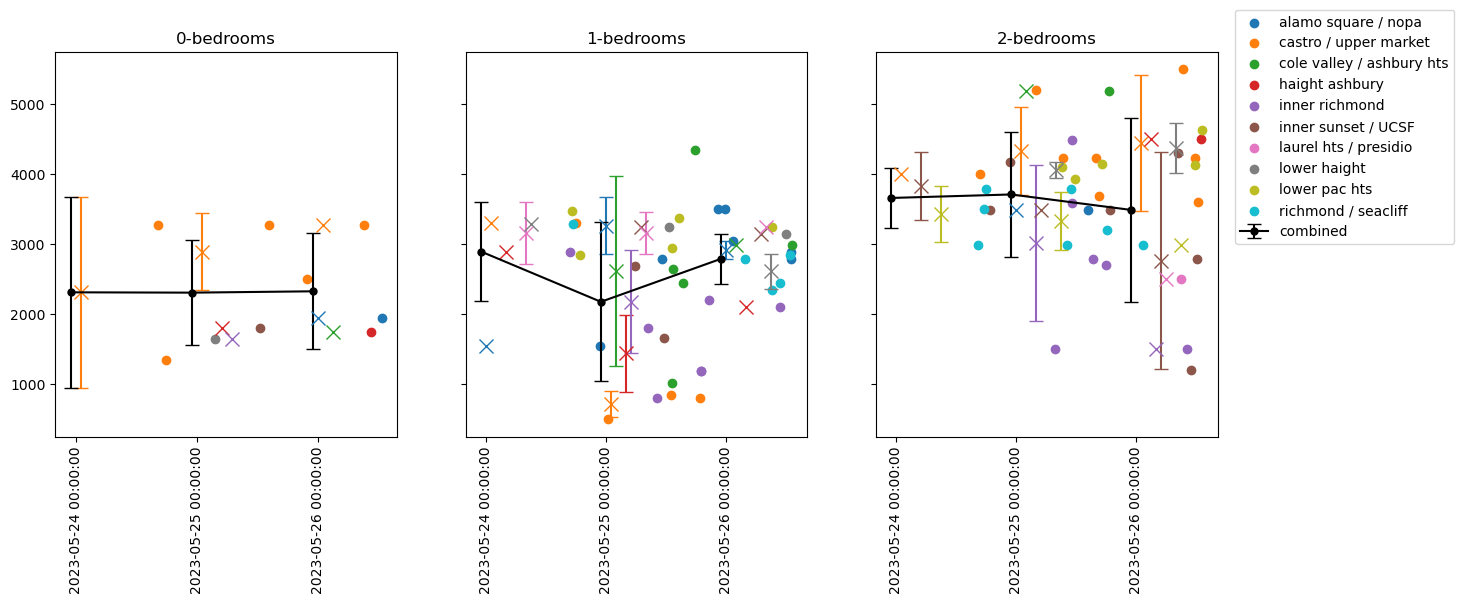

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

weekly = data.groupby(['bedrooms', 'location', pd.Grouper(key='date', freq='D', label='left')])
total = data.groupby(['bedrooms', pd.Grouper(key='date', freq='D', label='left')])

mu, sigma = weekly.price.mean(), weekly.price.std()
mut, sigmat = total.price.mean(), total.price.std()
# plt.fill_between(
#     x[filt], (mu.values-sigma.values)[filt], (mu.values + sigma.values)[filt],
#     alpha=.3,
# )
# plt.plot(mu.index, mu.values)
nbeds = mu.index.get_level_values('bedrooms').nunique()
fig, axs = plt.subplots(1, nbeds, figsize=(5*nbeds, 5), sharey=True)

for j,n in enumerate(mu.index.get_level_values('bedrooms').unique()):
    ax = axs[j]
    for i,loc in enumerate(sorted(mu.index.get_level_values('location').unique())):
        try:
            ax.errorbar(
                mu[n, loc].index + datetime.timedelta(hours=i), mu[n, loc].values, yerr=sigma[n, loc].values,
                marker='x', capsize=5, markersize=10, ls='none',
        #         color='tab:blue'
            )

        except Exception as e:
            pass
            
        sel = (data.location == loc) & (data.bedrooms == n)
        ax.scatter(data[sel].date, data[sel].price, label=loc)

    ax.errorbar(
        mut[n].index - datetime.timedelta(hours=1), mut[n].values, 
        yerr=sigmat[n].values, marker='o', capsize=5, markersize=5,
        color='black', label='combined'
    )
    ax.set_xticks(sorted(mu.index.get_level_values('date').unique()), 
                  sorted(mu.index.get_level_values('date').unique()),
#                   mu.columns.strftime('%h %d %H00'), 
                  rotation=90
            )
    ax.set_title('{}-bedrooms'.format(n))
axs[-1].legend(loc=(1.05,0.5))
#     ax.legend()
# plt.scatter()
plt.show()

In [200]:
total.price.mean()

bedrooms  date      
0         2023-05-24         2312.0
          2023-05-25        2307.25
          2023-05-26    2326.333333
1         2023-05-24    2894.166667
          2023-05-25         2176.4
          2023-05-26         2768.5
2         2023-05-24         3660.0
          2023-05-25    3709.833333
          2023-05-26    3385.545455
Name: price, dtype: object

Index(['1600 May 24', '1700 May 24', '1800 May 24', '1900 May 24',
       '2000 May 24', '2100 May 24', '2200 May 24', '2300 May 24',
       '0000 May 25', '0100 May 25', '0200 May 25', '0300 May 25',
       '0400 May 25', '0500 May 25', '0600 May 25', '0700 May 25',
       '0800 May 25', '0900 May 25', '1000 May 25', '1100 May 25',
       '1200 May 25', '1300 May 25', '1400 May 25', '1500 May 25',
       '1600 May 25', '1700 May 25', '1800 May 25', '1900 May 25'],
      dtype='object', name='date')

,name,link,location,price,date,code
0,Cole Valley Studio • Open floor plan • Large c...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,1023,2023-05-25 13:14:39,7625253700
1,May Sublet - 1 bd in 2 bed apartment (weekly a...,https://sfbay.craigslist.org/sfc/sub/d/san-fra...,cole valley / ashbury hts,1655,2023-05-02 12:54:15,7614463801
2,Large Victorian Styled Room Available in Centr...,https://sfbay.craigslist.org/sfc/roo/d/san-fra...,cole valley / ashbury hts,1947,2023-05-17 14:16:18,7622334071
3,1BR 1BATH NEAR UCSF PARNASSUS BRAND NEW KITCHE...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2200,2023-04-28 14:33:51,7615480294
4,Fully furnished room with private bathroom and...,https://sfbay.craigslist.org/sfc/sub/d/san-fra...,cole valley / ashbury hts,2200,2023-05-17 12:56:35,7622300083
5,GORGEOUS ONE-BEDROOM in the Heart of Cole Vall...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2445,2023-05-04 13:19:57,7607296113
6,Updated 1 Bedroom Apt in Corona Heights!,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2450,2023-05-02 06:59:53,7616701730
7,large 1 bedroom in classic Edwardian building,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2475,2023-05-07 14:19:41,7618674638
8,1 BR./1 BA. - APARTMENT - VIEWING BY APPOINTMENT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2475,2023-05-22 16:53:23,7624206728
9,Huge 1BR Apt w/ Laundry On-site & Parking Incl...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2595,2023-05-24 15:29:25,7620477842


In [119]:
data.groupby(pd.Grouper(key='date', freq='W-MON', label='left')).price

In [85]:
data.groupby(pd.DatetimeIndex(data.date))

In [71]:
pd.read_pickle('data/apts_bdr1_cole.pkl')

,name,link,location,price,date,code
0,Cole Valley Studio • Open floor plan • Large c...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,1023,Thu May 25 2023 13:14:39,7625253700
1,May Sublet - 1 bd in 2 bed apartment (weekly a...,https://sfbay.craigslist.org/sfc/sub/d/san-fra...,cole valley / ashbury hts,1655,Tue May 02 2023 12:54:15,7614463801
2,Large Victorian Styled Room Available in Centr...,https://sfbay.craigslist.org/sfc/roo/d/san-fra...,cole valley / ashbury hts,1947,Wed May 17 2023 14:16:18,7622334071
3,1BR 1BATH NEAR UCSF PARNASSUS BRAND NEW KITCHE...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2200,Fri Apr 28 2023 14:33:51,7615480294
4,Fully furnished room with private bathroom and...,https://sfbay.craigslist.org/sfc/sub/d/san-fra...,cole valley / ashbury hts,2200,Wed May 17 2023 12:56:35,7622300083
5,GORGEOUS ONE-BEDROOM in the Heart of Cole Vall...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2445,Thu May 04 2023 13:19:57,7607296113
6,Updated 1 Bedroom Apt in Corona Heights!,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2450,Tue May 02 2023 06:59:53,7616701730
7,large 1 bedroom in classic Edwardian building,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2475,Sun May 07 2023 14:19:41,7618674638
8,1 BR./1 BA. - APARTMENT - VIEWING BY APPOINTMENT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2475,Mon May 22 2023 16:53:23,7624206728
9,Huge 1BR Apt w/ Laundry On-site & Parking Incl...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,cole valley / ashbury hts,2595,Wed May 24 2023 15:29:25,7620477842
